
# Bar Inventory Analysis & Forecasting 📊🍸

**Dataset:** Consumption Dataset - Bar Inventory  
**Objective:** Exploratory Data Analysis (EDA), Forecasting (ARIMA, Prophet), Inventory Simulation (Par Level, Reorder Point), Reporting.

---

**Sections:**  
✅ Descriptive Statistics and EDA  
✅ Visualization (Trends, Outliers, Consumption)  
✅ Forecasting (Moving Averages, ARIMA, Prophet)  
✅ Inventory Recommendation (Par Level, Reorder Point)  
✅ Simulation (Inventory scenarios)  
✅ Reporting Insights


In [29]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta

In [30]:
df = pd.read_excel('Consumption Dataset.xlsx')

In [31]:
df.head()

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90


In [32]:
df.columns

Index(['Date Time Served', 'Bar Name', 'Alcohol Type', 'Brand Name',
       'Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)',
       'Closing Balance (ml)'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date Time Served      6575 non-null   datetime64[ns]
 1   Bar Name              6575 non-null   object        
 2   Alcohol Type          6575 non-null   object        
 3   Brand Name            6575 non-null   object        
 4   Opening Balance (ml)  6575 non-null   float64       
 5   Purchase (ml)         6575 non-null   float64       
 6   Consumed (ml)         6575 non-null   float64       
 7   Closing Balance (ml)  6575 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 411.1+ KB


In [34]:
df.shape

(6575, 8)

In [35]:
df.isnull().sum()

,0
Date Time Served,0
Bar Name,0
Alcohol Type,0
Brand Name,0
Opening Balance (ml),0
Purchase (ml),0
Consumed (ml),0
Closing Balance (ml),0


<Axes: >

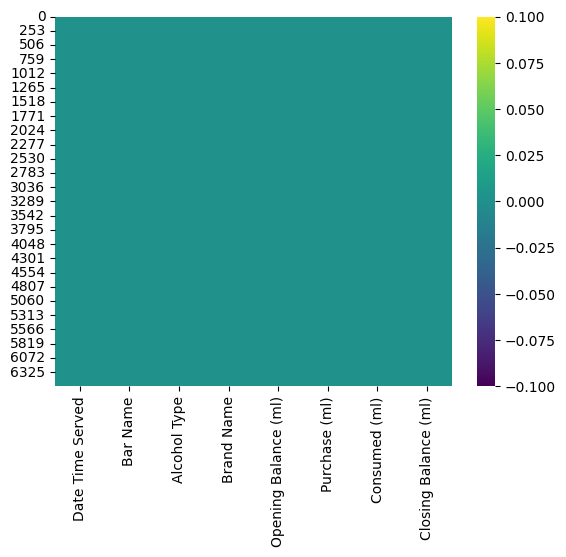

In [36]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap = 'viridis')

##Step 1: Data Cleaning

In [37]:
df['Date Time Served'] = pd.to_datetime(df['Date Time Served'], format='mixed', errors='coerce')
df.dropna(subset=['Date Time Served'], inplace=True)

# Extract date & time parts

In [38]:
df['Date'] = df['Date Time Served'].dt.date
df['Time'] = df['Date Time Served'].dt.time
df['Hour'] = df['Date Time Served'].dt.hour
df['Day'] = df['Date Time Served'].dt.day
df['Month'] = df['Date Time Served'].dt.month
df['Year'] = df['Date Time Served'].dt.year
df['Weekday'] = df['Date Time Served'].dt.day_name()

In [39]:
df.head()

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Time,Hour,Day,Month,Year,Weekday
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,2023-01-01,19:35:00,19,1,1,2023,Sunday
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37,2023-01-01,10:07:00,10,1,1,2023,Sunday
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28,2023-01-01,11:26:00,11,1,1,2023,Sunday
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53,2023-01-01,13:53:00,13,1,1,2023,Sunday
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90,2023-01-01,22:28:00,22,1,1,2023,Sunday


In [40]:
# Check nulls again
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Date Time Served        0
Bar Name                0
Alcohol Type            0
Brand Name              0
Opening Balance (ml)    0
Purchase (ml)           0
Consumed (ml)           0
Closing Balance (ml)    0
Date                    0
Time                    0
Hour                    0
Day                     0
Month                   0
Year                    0
Weekday                 0
dtype: int64


In [41]:

df.describe()[['Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)', 'Closing Balance (ml)']]


,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
count,6575.000000,6575.000000,6575.000000,6575.000000
mean,2468.393518,315.841757,299.419264,2484.816011
min,0.000000,0.000000,0.000000,0.000000
25%,619.135000,0.000000,156.640000,611.000000
50%,1848.440000,0.000000,300.390000,1849.840000
75%,3853.020000,526.345000,450.870000,3906.050000
max,11862.520000,1999.840000,1180.580000,11862.520000
std,2284.556232,582.120264,191.903874,2302.362117


In [14]:
# 🧹 Drop remaining rows with nulls in key numeric columns
df.dropna(subset=['Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)', 'Closing Balance (ml)'], inplace=True)

# 🧩 Step 2: Feature Engineering

In [16]:
df['Net Balance Change (ml)'] = df['Opening Balance (ml)'] + df['Purchase (ml)'] - df['Closing Balance (ml)']

In [17]:
df.head()

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Time,Hour,Day,Month,Year,Weekday,Net Balance Change (ml)
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2555.04,1824.84,0.0,4379.88,2023-01-01,19:35:00,19,1,1,2023,Sunday,0.0
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1344.37,0.00,0.0,1344.37,2023-01-01,10:07:00,10,1,1,2023,Sunday,0.0
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1034.28,0.00,0.0,1034.28,2023-01-01,11:26:00,11,1,1,2023,Sunday,0.0
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2194.53,0.00,0.0,2194.53,2023-01-01,13:53:00,13,1,1,2023,Sunday,0.0
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1020.90,0.00,0.0,1020.90,2023-01-01,22:28:00,22,1,1,2023,Sunday,0.0


# 📊 Step 3: EDA

<Axes: title={'center': 'Top Alcohol Types by Total Consumption'}, xlabel='Alcohol Type'>

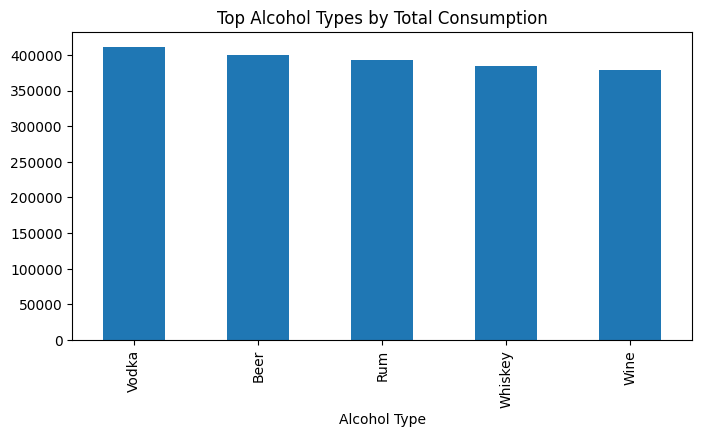

In [18]:
## 3.1 - Top Alcohol Types by Total Consumption
top_types = df.groupby('Alcohol Type')['Consumed (ml)'].sum().sort_values(ascending=False)
top_types.plot(kind='bar', figsize=(8, 4), title='Top Alcohol Types by Total Consumption')

In [19]:
## 3.2 - Top Brands per Bar
top_brands = df.groupby(['Bar Name', 'Brand Name'])['Consumed (ml)'].sum().reset_index()
top_5 = top_brands.sort_values(['Bar Name', 'Consumed (ml)'], ascending=[True, False]).groupby('Bar Name').head(5)

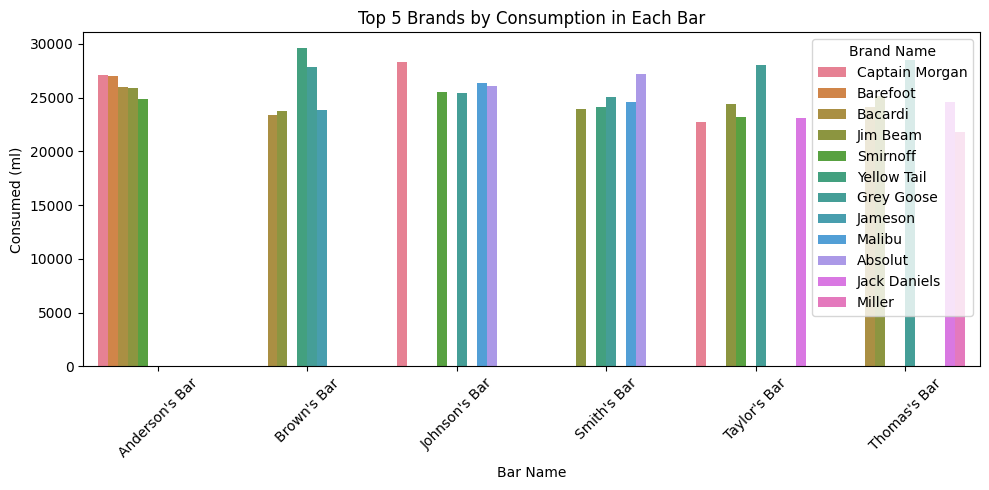

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5, x='Bar Name', y='Consumed (ml)', hue='Brand Name')
plt.title("Top 5 Brands by Consumption in Each Bar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

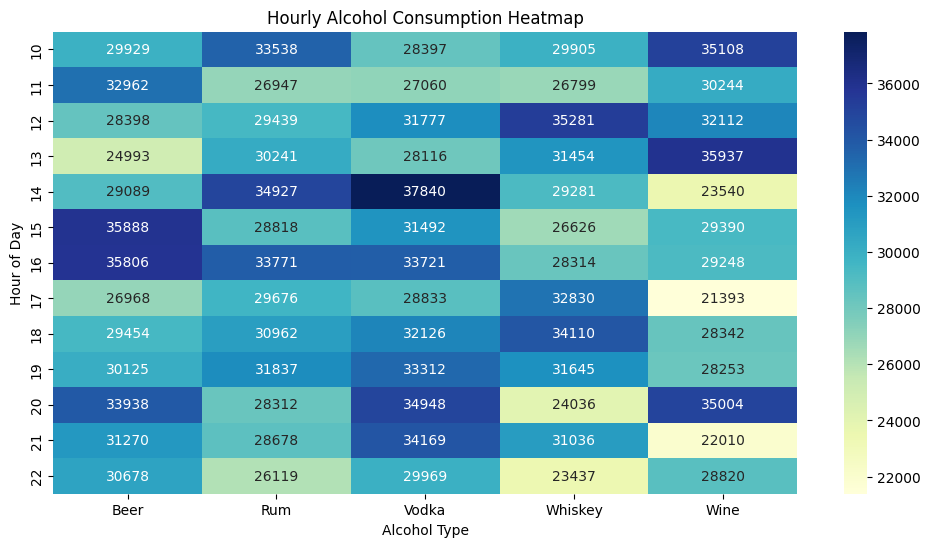

In [21]:
## 3.3 - Heatmap of Hourly Consumption
pivot = df.pivot_table(index='Hour', columns='Alcohol Type', values='Consumed (ml)', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Hourly Alcohol Consumption Heatmap')
plt.ylabel('Hour of Day')
plt.show()

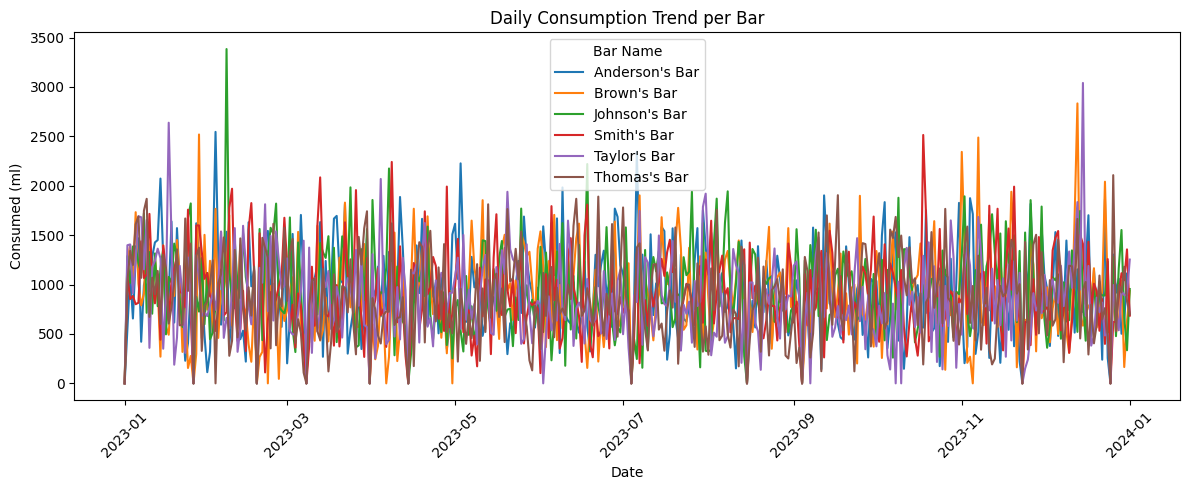

In [22]:
## 3.4 - Average Daily Consumption per Bar
daily = df.groupby(['Date', 'Bar Name'])['Consumed (ml)'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily, x='Date', y='Consumed (ml)', hue='Bar Name')
plt.title("Daily Consumption Trend per Bar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 🧮 Step 4: Prepare for Forecasting

In [23]:
consumption_ts = df.groupby(['Date', 'Bar Name', 'Alcohol Type', 'Brand Name'])['Consumed (ml)'].sum().reset_index()

In [24]:
# Example: Resample daily data for one bar/brand
sample = consumption_ts[(consumption_ts['Bar Name'] == "Smith's Bar") &
                        (consumption_ts['Brand Name'] == "Captain Morgan")]
sample = sample[['Date', 'Consumed (ml)']].copy()
sample['Date'] = pd.to_datetime(sample['Date'])
sample = sample.set_index('Date').resample('D').sum().fillna(0)

<Axes: title={'center': "Daily Consumption - Smith's Bar: Captain Morgan"}, xlabel='Date'>

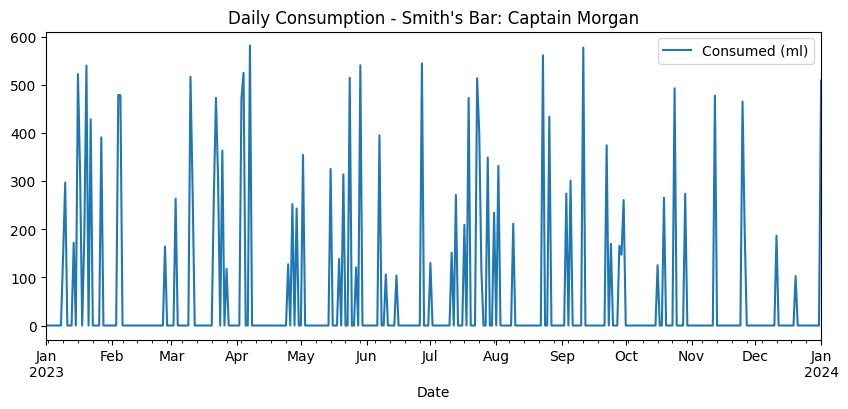

In [25]:
sample.plot(figsize=(10, 4), title="Daily Consumption - Smith's Bar: Captain Morgan")

In [26]:
from prophet import Prophet

# Filter your data
brand_df = df[(df['Bar Name'] == "Smith's Bar") &
              (df['Brand Name'] == "Captain Morgan")]

In [27]:
# Group by date and sum consumption
ts = brand_df.groupby('Date')['Consumed (ml)'].sum().reset_index()
ts['Date'] = pd.to_datetime(ts['Date'])
ts = ts.rename(columns={'Date': 'ds', 'Consumed (ml)': 'y'})

In [42]:
# Fill missing dates (Prophet needs continuous date range)
ts = ts.set_index('ds').resample('D').sum().fillna(0).reset_index()

In [ ]:
# Build and fit model
model = Prophet()
model.fit(ts)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwr6z_6u7/bseydckf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwr6z_6u7/fnz2mmcz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15883', 'data', 'file=/tmp/tmpwr6z_6u7/bseydckf.json', 'init=/tmp/tmpwr6z_6u7/fnz2mmcz.json', 'output', 'file=/tmp/tmpwr6z_6u7/prophet_model275dwxrk/prophet_model-20250618062514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:25:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:25:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dataframe
future = model.make_future_dataframe(periods=14)  # predict next 14 days
forecast = model.predict(future)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


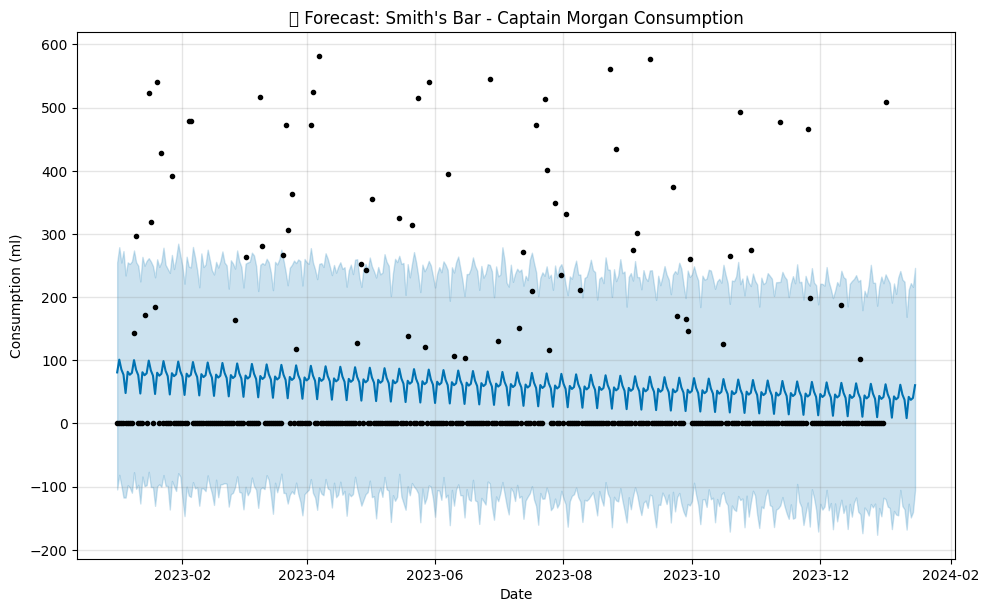

In [ ]:
# Plot results
model.plot(forecast)
plt.title("📈 Forecast: Smith's Bar - Captain Morgan Consumption")
plt.xlabel("Date")
plt.ylabel("Consumption (ml)")
plt.show()

In [ ]:
# Optional: show prediction table
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
366,2024-01-02,46.445211,-131.697403,228.936237
367,2024-01-03,38.151281,-133.933662,221.893723
368,2024-01-04,9.054002,-167.347769,191.140869
369,2024-01-05,42.750631,-138.620048,221.559960
370,2024-01-06,38.012881,-144.281566,205.073763
371,2024-01-07,40.989720,-145.550144,230.915791
372,2024-01-08,61.208695,-105.326409,241.266944
373,2024-01-09,45.695559,-130.832987,227.642299
374,2024-01-10,37.401629,-136.100216,224.300960
375,2024-01-11,8.304350,-168.092335,168.674536


# Inventory Estimation (Par Level Suggestion)

In [ ]:
# Calculate average & std dev for future demand
predicted = forecast.set_index('ds').tail(14)
avg_demand = predicted['yhat'].mean()
std_demand = predicted['yhat'].std()

# Basic par level formula (can be refined)
lead_time = 2  # assume 2-day delivery
safety_stock = 1.5 * std_demand
par_level = avg_demand * lead_time + safety_stock

print(f"📦 Suggested Inventory (Par Level): {par_level:.2f} ml for next 2 days")


📦 Suggested Inventory (Par Level): 100.80 ml for next 2 days


# Optional: Forecast with XGBoost (ML Model)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature Engineering
df_ml = ts.copy()
df_ml['dayofweek'] = df_ml['ds'].dt.dayofweek
df_ml['month'] = df_ml['ds'].dt.month
df_ml['day'] = df_ml['ds'].dt.day

# Lag features
df_ml['lag_1'] = df_ml['y'].shift(1)
df_ml['lag_2'] = df_ml['y'].shift(2)
df_ml['rolling_mean_3'] = df_ml['y'].rolling(window=3).mean()

df_ml.dropna(inplace=True)

# Train/Test Split
X = df_ml.drop(['ds', 'y'], axis=1)
y = df_ml['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


RMSE: 27.016710558294893
